In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [4]:
# Load the dataset from a CSV file
data1 = pd.read_csv('Air_quality_index.csv')
data = data1.copy()
data['AQI_Range'] = data.apply(lambda row: "High" if row['Air_Quality_Index'] > 100 else "Low", axis=1)
data.head(5)

,Latitude,Longitude,POC,State Name,County Name,City Name,Date Local,Month,Day,Event Type,Observation Count,Mean_Ozone_Concentration,Max_Ozone_Value,Hour_Max_Ozone_Concentration,Air_Quality_Index,AQI_Range
0,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-02-28,2,28,None,1,0.038000,0.038,14.0,35,Low
1,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-01,3,1,None,17,0.037235,0.054,12.0,50,Low
2,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-02,3,2,None,17,0.038235,0.055,12.0,51,Low
3,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-03,3,3,None,9,0.024333,0.043,14.0,40,Low
4,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-04,3,4,None,17,0.049647,0.063,10.0,77,Low


In [6]:
#Performed the following changes for decision tree in the above dataset.
#If the Air_Quality_Index lies between 0 to 50 the AQI_Range is good, and anything above 50 is bad
df=data
df4=df
median_value = np.median(df['Air_Quality_Index'])
median_value

39.0

In [7]:
#Setting the range for categorizing the AQI index into AQI_Range
def AQI_Range(x):
    if x<=50.0:
        return "Good"
    elif x>50:
        return "Bad"
df4['AQI_Range'] = df4['Air_Quality_Index'] .apply(AQI_Range)

df4.head(5)
df.to_csv('newdataset1.csv', index=False)

In [8]:
df = pd.read_csv('newdataset1.csv')
df1 = df.copy()
df1.head(5)

,Latitude,Longitude,POC,State Name,County Name,City Name,Date Local,Month,Day,Event Type,Observation Count,Mean_Ozone_Concentration,Max_Ozone_Value,Hour_Max_Ozone_Concentration,Air_Quality_Index,AQI_Range
0,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-02-28,2,28,None,1,0.038000,0.038,14.0,35,Good
1,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-01,3,1,None,17,0.037235,0.054,12.0,50,Good
2,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-02,3,2,None,17,0.038235,0.055,12.0,51,Bad
3,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-03,3,3,None,9,0.024333,0.043,14.0,40,Good
4,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-04,3,4,None,17,0.049647,0.063,10.0,77,Bad


In [9]:
# Binning the continuous columns 
bin_labels = ['low', 'medium', 'high']

df1['Mean_Ozone_Concentration'] = pd.cut(df1['Mean_Ozone_Concentration'], bins=3, labels=bin_labels)
df1['Max_Ozone_Value'] = pd.cut(df1['Max_Ozone_Value'], bins=3, labels=bin_labels)
df1['Hour_Max_Ozone_Concentration'] = pd.cut(df1['Hour_Max_Ozone_Concentration'], bins=3, labels=bin_labels)

# Encode categorical columns using LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#df1 = df.copy()
columns_to_encode = ["State Name", "County Name", "City Name","Event Type","Mean_Ozone_Concentration", "Max_Ozone_Value", "Hour_Max_Ozone_Concentration"]
df1[columns_to_encode] = df1[columns_to_encode].apply(le.fit_transform)
df1.head(5)

,Latitude,Longitude,POC,State Name,County Name,City Name,Date Local,Month,Day,Event Type,Observation Count,Mean_Ozone_Concentration,Max_Ozone_Value,Hour_Max_Ozone_Concentration,Air_Quality_Index,AQI_Range
0,30.497478,-87.880258,1,0,23,202,2022-02-28,2,28,2,1,2,1,0,35,Good
1,30.497478,-87.880258,1,0,23,202,2022-03-01,3,1,2,17,2,1,0,50,Good
2,30.497478,-87.880258,1,0,23,202,2022-03-02,3,2,2,17,2,1,0,51,Bad
3,30.497478,-87.880258,1,0,23,202,2022-03-03,3,3,2,9,1,1,0,40,Good
4,30.497478,-87.880258,1,0,23,202,2022-03-04,3,4,2,17,0,2,2,77,Bad


In [11]:
# Selecting relevant features and target variable
features = df1[['State Name', 'Mean_Ozone_Concentration', 'Max_Ozone_Value', 'Hour_Max_Ozone_Concentration']]
y = df1['AQI_Range']
df1['AQI_Range'] = data['AQI_Range'].map({'Good': 0.0, 'Bad': 1.0})

# Now, split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

X_train

,State Name,Mean_Ozone_Concentration,Max_Ozone_Value,Hour_Max_Ozone_Concentration
194921,50,2,1,0
142123,35,2,1,1
75092,14,2,1,0
23367,4,2,1,1
186851,45,0,1,1
...,...,...,...,...
119879,30,2,1,2
103694,22,1,1,0
131932,32,2,1,0
146867,35,1,1,2


In [12]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (140706, 4)
y_train shape: (140706,)
X_test shape: (60303, 4)
y_test shape: (60303,)


In [13]:
# Display the normalized value counts of X_train, which shows the distribution of features in the training data
# This code helps you understand how the features are distributed in the training data
X_train.value_counts(normalize=True)

State Name  Mean_Ozone_Concentration  Max_Ozone_Value  Hour_Max_Ozone_Concentration
4           2                         1                2                               0.036281
                                                       1                               0.024135
44          2                         1                2                               0.021740
35          2                         1                2                               0.017633
4           1                         1                2                               0.016431
                                                                                         ...   
46          0                         2                1                               0.000007
49          2                         2                1                               0.000007
16          0                         2                1                               0.000007
12          0                         2             

In [14]:
# Display the normalized value counts of y_train, which shows the distribution of target labels in the training data
# This code helps you understand how the target labels are distributed in the training data
y_train.value_counts(normalize=True)

0.0    0.871072
1.0    0.128928
Name: AQI_Range, dtype: float64

In [15]:
# Display the normalized value counts of y_test, which shows the distribution of target labels in the testing data
# This code helps you understand how the target labels are distributed in the testing data, which is important for evaluating model performance
y_test.value_counts(normalize=True)

0.0    0.870603
1.0    0.129397
Name: AQI_Range, dtype: float64

In [16]:
# Build and training a Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train) #fitting the model
#checking the accuracy and validating
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = model.score(X_test, y_test)


In [17]:
# Display training and validation accuracy
print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))


Training Accuracy: 0.98
Validation Accuracy: 0.98


In [18]:
# Get the depth of the decision tree
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 22


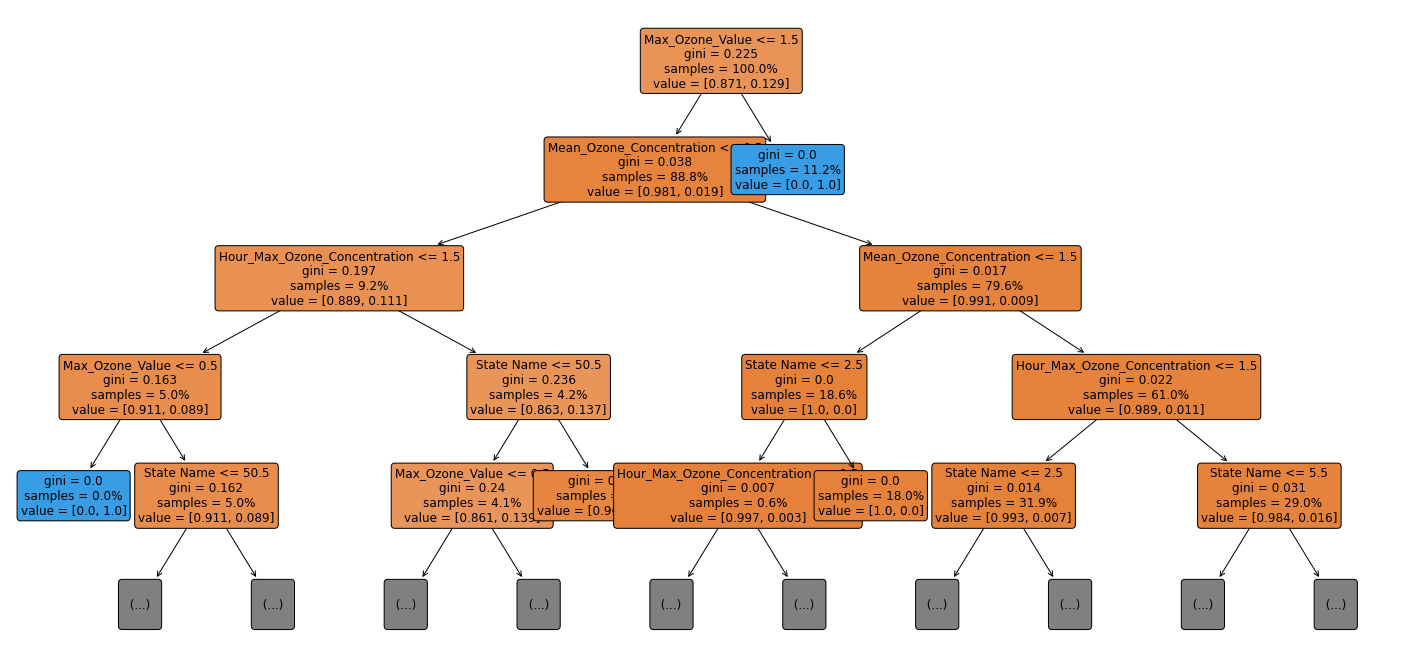

In [19]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree= model,
    feature_names= X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=4,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);


In [20]:
from sklearn.ensemble import AdaBoostClassifier

# List of number of trees
n_trees_list = [10, 50, 100, 200, 500]

# Empty lists to store training and test accuracies
train_accuracies = []
test_accuracies = []

for n_trees in n_trees_list:
    # Initialize AdaBoostClassifier
    ada_clf = AdaBoostClassifier(n_estimators=n_trees, random_state=42)
    
    # Train the model
    ada_clf.fit(X_train, y_train)
    
    # Get the accuracy for training and test set
    train_accuracy = accuracy_score(y_train, ada_clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, ada_clf.predict(X_test))
    
    # Append the accuracies to respective lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
print("Boosting - Training Accuracy:", train_accuracies)
print("Boosting - Testing Accuracy:", test_accuracies)



Boosting - Training Accuracy: [0.9829573721092206, 0.9829786931616278, 0.9829786931616278, 0.9829786931616278, 0.9829786931616278]
Boosting - Testing Accuracy: [0.9829195894068289, 0.9829693381755468, 0.9829693381755468, 0.9829693381755468, 0.9829693381755468]


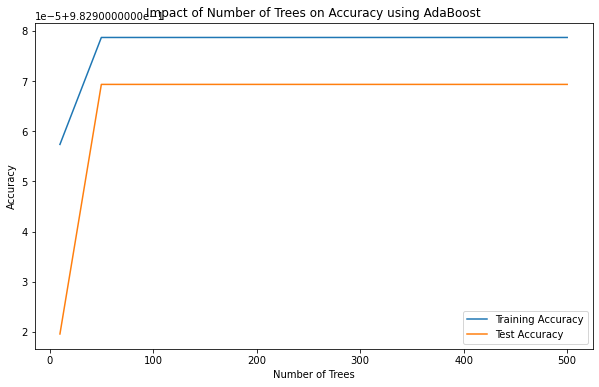

In [21]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_trees_list, train_accuracies, label="Training Accuracy")
plt.plot(n_trees_list, test_accuracies, label="Test Accuracy")
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Impact of Number of Trees on Accuracy using AdaBoost')
plt.legend()
plt.show()


In [22]:
from sklearn.ensemble import BaggingClassifier

# List to store accuracies
bag_train_accuracies = []
bag_test_accuracies = []


for n_trees in n_trees_list:
    # Initialize BaggingClassifier
    bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=n_trees, random_state=42)
    
    # Train the model
    bag_clf.fit(X_train, y_train)
    
    # Get the accuracy for training and test set
    train_accuracy = accuracy_score(y_train, bag_clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, bag_clf.predict(X_test))
    
    # Append the accuracy to the list
    bag_train_accuracies.append(train_accuracy)
    bag_test_accuracies.append(test_accuracy)

print("Bagging - Training Accuracy:", bag_train_accuracies)
print("Bagging - Testing Accuracy:", bag_test_accuracies)

Bagging - Training Accuracy: [0.9829786931616278, 0.9829786931616278, 0.9829786931616278, 0.9829786931616278, 0.9829786931616278]
Bagging - Testing Accuracy: [0.9829693381755468, 0.9829693381755468, 0.9829693381755468, 0.9829693381755468, 0.9829693381755468]


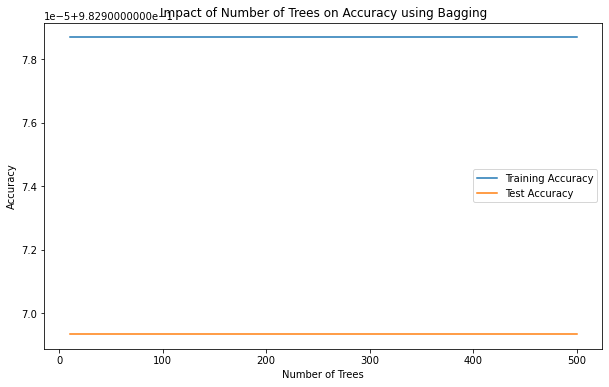

In [23]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_trees_list, bag_train_accuracies, label="Training Accuracy")
plt.plot(n_trees_list, bag_test_accuracies, label="Test Accuracy")
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Impact of Number of Trees on Accuracy using Bagging')
plt.legend()
plt.show()


In [25]:
from sklearn.ensemble import RandomForestClassifier

# List to store accuracies and feature importances
rf_accuracies = []
feature_importances = []

for n_trees in n_trees_list:
    # Initialize RandomForestClassifier
    rf_clf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    
    # Train the model
    rf_clf.fit(X_train, y_train)
    
    # Get the accuracy for training and test
    test_accuracy = accuracy_score(y_test, rf_clf.predict(X_test))
    
    # Append the accuracy and feature importances to the respective lists
    rf_accuracies.append(test_accuracy)
    feature_importances.append(rf_clf.feature_importances_)

print("Random Forest - Testing Accuracy:", rf_accuracies)
print(feature_importances)


Random Forest - Testing Accuracy: [0.9829693381755468, 0.9829693381755468, 0.9829693381755468, 0.9829693381755468, 0.9829693381755468]
[array([0.00383594, 0.25288519, 0.74015378, 0.00312509]), array([0.00644833, 0.19474403, 0.79549853, 0.0033091 ]), array([0.0067746 , 0.20256173, 0.78712961, 0.00353406]), array([0.00664144, 0.17501485, 0.81536078, 0.00298293]), array([0.00653351, 0.17485876, 0.81566734, 0.00294039])]


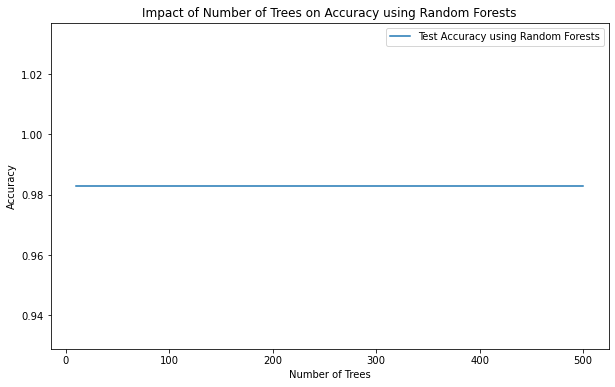

In [26]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_trees_list, rf_accuracies, label="Test Accuracy using Random Forests")
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Impact of Number of Trees on Accuracy using Random Forests')
plt.legend()
plt.show()

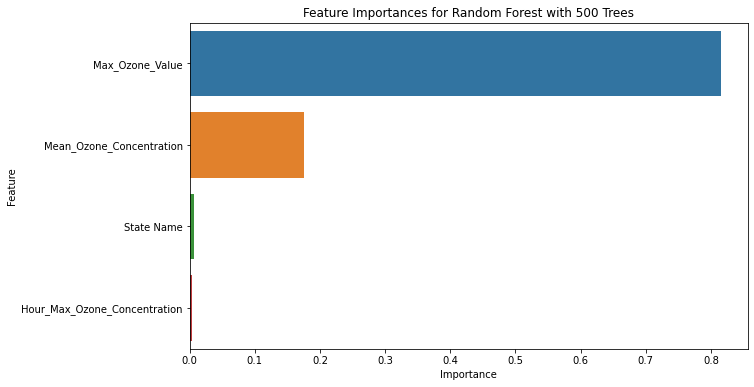

In [27]:
# Displaying the feature importances
importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances[-1]
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances for Random Forest with {} Trees'.format(n_trees_list[-1]))
plt.show()
